In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [41]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [42]:
Male = pd.get_dummies(df['sex'], drop_first = True)
df = pd.concat([df, Male], axis =1)

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [43]:
Smoker = pd.get_dummies(df['smoker'], drop_first = True)
df = pd.concat([df, Smoker], axis =1)

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [44]:
df = df.rename(columns = {'yes':'Smoker'})

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [13]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [39]:
region = pd.get_dummies(df['region'])
df = pd.concat([df, region], axis = 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


# Exploratory Analysis

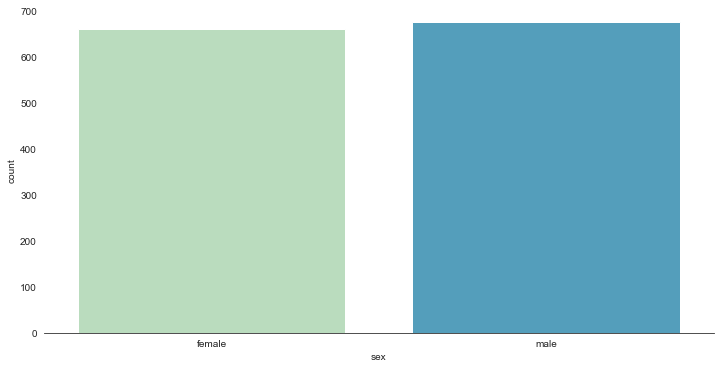

In [15]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.countplot(x='sex', data= df, palette = 'GnBu')
sns.despine(left = True)

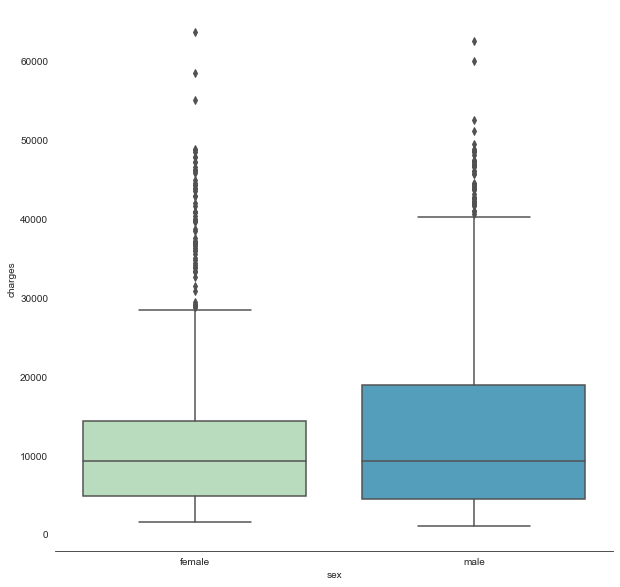

In [31]:
plt.figure(figsize = (10,10))
sns.set_style('white')
sns.boxplot(x='sex', y= 'charges', data = df, palette ='GnBu')
sns.despine(left = True)

<AxesSubplot:xlabel='age', ylabel='charges'>

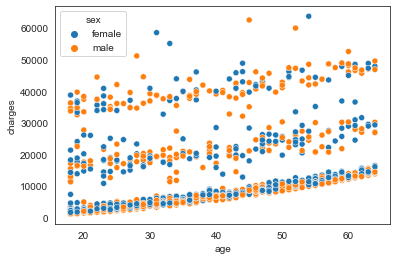

In [33]:

sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'sex')

<AxesSubplot:xlabel='age', ylabel='charges'>

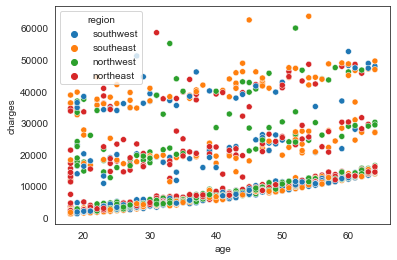

In [18]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'region')

<AxesSubplot:xlabel='age', ylabel='charges'>

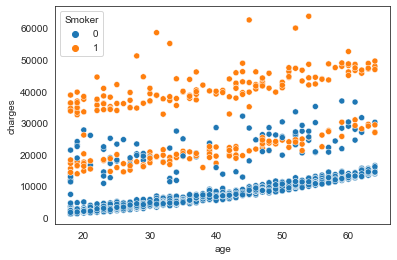

In [19]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'Smoker')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

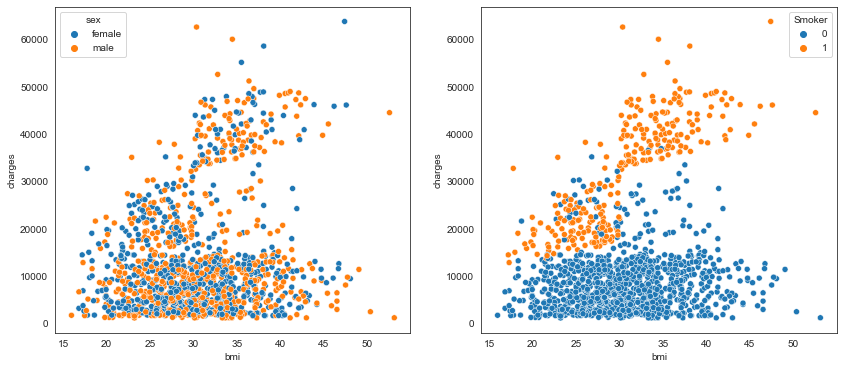

In [20]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'sex', ax= ax[0])
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker', ax = ax[1])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

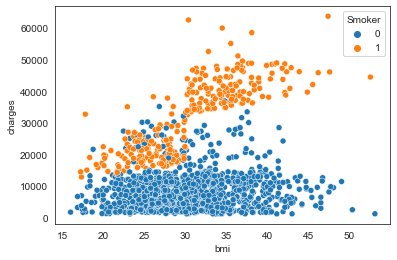

In [21]:
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker')

In [45]:
df.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)
df

,age,bmi,children,charges,male,Smoker
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [104]:
df.drop(['children'], axis=1, inplace=True)

In [105]:
df

,age,bmi,charges,male,Smoker
0,19,27.900,16884.92400,0,1
1,18,33.770,1725.55230,1,0
2,28,33.000,4449.46200,1,0
3,33,22.705,21984.47061,1,0
4,32,28.880,3866.85520,1,0
...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0
1334,18,31.920,2205.98080,0,0
1335,18,36.850,1629.83350,0,0
1336,21,25.800,2007.94500,0,0


<AxesSubplot:>

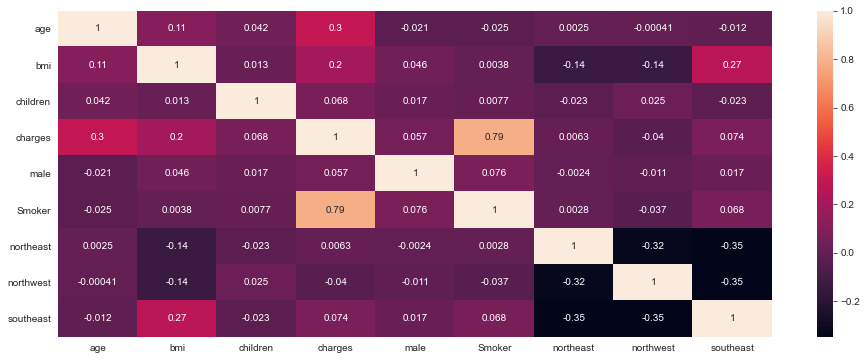

In [23]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot = True)

# Splitting the data

In [106]:
x = df.iloc[:,df.columns!="charges"]
y = df["charges"]
[[x.head()]]


[[   age     bmi  male  Smoker
  0   19  27.900     0       1
  1   18  33.770     1       0
  2   28  33.000     1       0
  3   33  22.705     1       0
  4   32  28.880     1       0]]

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [54]:
x_train

,age,bmi,children,male,Smoker
23,34,31.920,1,0,1
950,57,18.335,0,1,0
176,38,27.835,2,1,0
1110,54,32.300,1,0,0
341,62,30.020,0,1,0
...,...,...,...,...,...
1100,33,19.095,2,0,1
822,18,31.130,0,0,0
1023,18,23.320,1,1,0
660,37,46.530,3,1,0


In [124]:
df.head()

,age,bmi,charges,male,Smoker
0,19,27.900,16884.92400,0,1
1,18,33.770,1725.55230,1,0
2,28,33.000,4449.46200,1,0
3,33,22.705,21984.47061,1,0
4,32,28.880,3866.85520,1,0


In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [109]:
# SCALE x_train and x_test
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)



In [72]:
x_test

array([[ 0.72232292,  1.13562954,  1.44281707, -1.05367747, -0.53131596],
       [ 1.56337668,  1.4299853 , -0.90541152,  0.94905702, -0.53131596],
       [-1.38031149, -0.88785605, -0.12266866,  0.94905702, -0.53131596],
       ...,
       [-0.8896968 ,  0.02044172, -0.12266866,  0.94905702, -0.53131596],
       [-0.67943336, -0.88785605,  0.66007421, -1.05367747, -0.53131596],
       [ 0.23170822,  0.71007522, -0.90541152,  0.94905702, -0.53131596]])

# Support vector regression

In [110]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train,y_train)

predict = regressor.predict(x_test)

In [126]:
predict[0:5]

array([9497.25196473, 9395.95069904, 9566.57446172, 9371.20171299,
       9519.09860003])

In [75]:
y_test

460     10381.47870
1034    12950.07120
15       1837.23700
1325    13143.33665
416      9140.95100
           ...     
925     25333.33284
1233    11345.51900
1108     2904.08800
1167     4529.47700
1149     5979.73100
Name: charges, Length: 268, dtype: float64

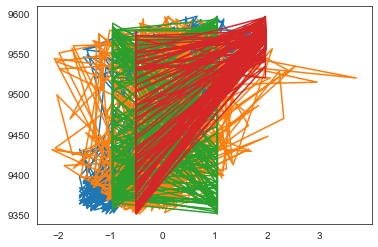

In [111]:
plt.plot(x_test,predict)
plt.show()

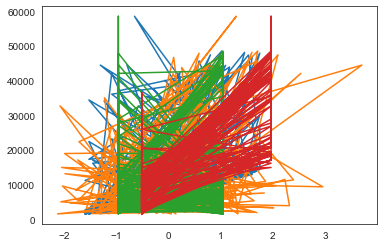

In [112]:
plt.plot(x_test,y_test)
plt.show()

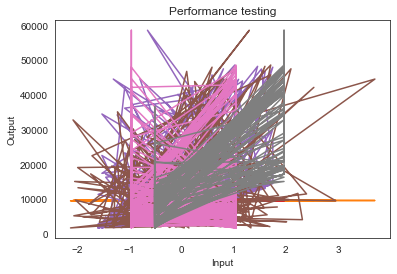

In [121]:
plt.plot(x_test, predict)

plt.plot(x_test, y_test)
plt.title("Performance testing")
plt.xlabel("Input")
plt.ylabel("Output")

plt.show()